##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:
entraine un modèle de classification pour prédiction par Réseau de neurones denses (Fully connected Neural Network), avec fonction d'activation ReLU.

Prend en entrée les fichiers:
    (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test_cat.csv, y_train_cat.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.

Fournit en sortie les fichiers:

    (models)/<nom_de_modele>.pkl


# Initialisation de variables et fonctions

In [1]:
# charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
%run init_notebook.py

random_state = 42
n_jobs = -1

In [2]:
# On importe les fonctions utiles à plusieurs modèles
import sys
sys.path.append('../')
from common_co2 import load_our_data_cat, display_norm_matrix, display_roc, adjust_with_penalty, check_differences

In [89]:
"""
!pip install tensorflow
"""

'\n!pip install tensorflow\n'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow'

In [91]:
"""
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "16"  # nombre de cœurs physiques réels
"""

'\nimport os\nos.environ["LOKY_MAX_CPU_COUNT"] = "16"  # nombre de cœurs physiques réels\n'

In [92]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data_cat()

In [93]:
# typical dimensions

# paramétrisation des couches
layer_01_neurons = 128
layer_02_neurons = 64
activation_01 = 'relu'
activation_02 = 'relu'
activation_output = 'softmax'
dropout_rate = 0.2
# paramétrisation de l'optimiseur
optimizer = 'adam'
my_loss = 'sparse_categorical_crossentropy'  # seulement si y_train est une série
metrics = ['accuracy']
# paramétrisation de l'apprentissage
epochs = 50
batch_size = 32


In [94]:
# dimensions for debugging

# paramétrisation des couches
layer_01_neurons = 32
layer_02_neurons = 4
activation_01 = 'relu'
activation_02 = 'relu'
activation_output = 'softmax'
dropout_rate = 0.2
# paramétrisation de l'optimiseur
optimizer = 'adam'
# my_loss = 'categorical_crossentropy' # seulement si y_train est one-hot
my_loss = 'sparse_categorical_crossentropy'  # seulement si y_train est une série
metrics = ['accuracy']
# paramétrisation de l'apprentissage
epochs = 3
batch_size = 32


In [95]:
# experiments

# paramétrisation des couches
layer_01_neurons = 256
layer_02_neurons = 256
layer_03_neurons = 64
activation_01 = 'relu'
activation_02 = 'relu'
activation_03 = 'relu'
activation_output = 'softmax'
dropout_rate = 0.1
# paramétrisation de l'optimiseur
optimizer = 'adam'
my_loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
# paramétrisation de l'apprentissage
epochs = 200
batch_size = 32


In [96]:


# TODO : on n'est pas obligé de faire du one-hot encoding pour y_test et y_train
# mais si on veut ensuite appliquer des pénalités au modèle il faudra alors le faire, 
# et utiliser my_loss='categorical_crossentropy'
import time
start_time=time.time()

num_classes = len(set(y_train)) 

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1


# Définir le modèle de réseau de neurones
model = Sequential([
    Dense(layer_01_neurons, activation=activation_01, input_dim=X_train_scaled.shape[1]),
    Dropout(dropout_rate),
    Dense(layer_02_neurons, activation=activation_02),
    Dropout(dropout_rate),
    # seulement si on met une troisième couche:
    Dense(layer_03_neurons, activation=activation_03),
    Dropout(dropout_rate),
    Dense(num_classes, activation=activation_output)  # Activation softmax pour la classification multi-classes
])


# Compiler le modèle
model.compile(optimizer=optimizer, loss=my_loss, metrics=metrics)

# Entraîner le modèle
history = model.fit(X_train_scaled, y_train_adjusted, 
                    validation_data=(X_test_scaled, y_test_adjusted), 
                    epochs=epochs, 
                    batch_size=batch_size)

end_time = time.time()
exec_time = end_time - start_time
print(f"Temps d'apprentissage = {exec_time:.2f} secondes")

Epoch 1/200


/media/gerard/dual/dataScientest/streamlitCrsDeep/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3092/3092 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7010 - loss: 0.7358 - val_accuracy: 0.8021 - val_loss: 0.4837
Epoch 2/200
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 3s 882us/step - accuracy: 0.7889 - loss: 0.5173 - val_accuracy: 0.8136 - val_loss: 0.4509
Epoch 3/200
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.8039 - loss: 0.4785 - val_accuracy: 0.8180 - val_loss: 0.4338
Epoch 4/200
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.8097 - loss: 0.4574 - val_accuracy: 0.8304 - val_loss: 0.4129
Epoch 5/200
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - accuracy: 0.8142 - loss: 0.4466 - val_accuracy: 0.8340 - val_loss: 0.3978
Epoch 6/200
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - accuracy: 0.8239 - loss: 0.4304 - val_accuracy: 0.8317 - val_loss: 0.3936
Epoch 7/200
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 3s 947us/step - accuracy: 0.8244 - loss: 0.4251 - val_accuracy: 0.8457 - val_loss: 0.3829
Epoch 8/200
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - accuracy: 0.8298 - loss:

In [97]:

# Évaluer les performances sur le jeu de test
from sklearn.metrics import f1_score, recall_score

# Evaluate the model to get loss and accuracy
loss, accuracy = model.evaluate(X_test_scaled, y_test_adjusted, verbose=0)

# Predict the classes for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)  # Get class indices for predictions

# Compute F1-score and Recall
f1 = f1_score(y_test_adjusted, y_pred_classes, average='weighted')  # Weighted for class imbalance
recall = recall_score(y_test_adjusted, y_pred_classes, average='weighted')

# Display the results
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Recall: {recall:.3f}")

773/773 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step  
Test Loss: 0.312
Test Accuracy: 0.873
F1-score: 0.872
Recall: 0.873


# Représentations graphiques des résultats pour le rapport

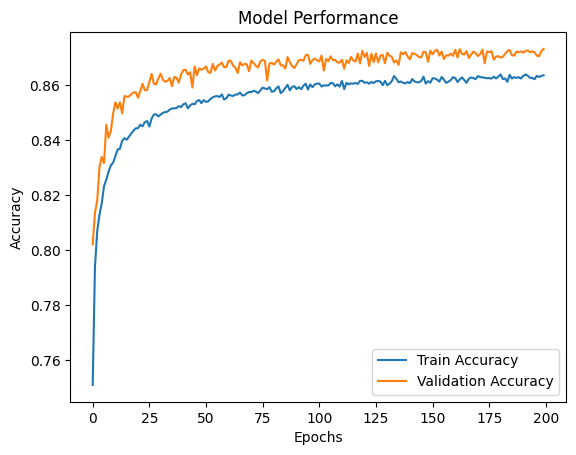

Temps d'apprentissage = 636 secondes


In [98]:

# Visualiser les performances pendant l'entraînement
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Performance')
plt.show()
print(f"Temps d'apprentissage = {exec_time:.0f} secondes")

In [109]:
name='Neural Network with dense layers'
hyperparams = f'layer_01_neurons={layer_01_neurons}, layer_02_neurons={layer_02_neurons}, activation_01={activation_01}, activation_02={activation_02}, dropout_rate={dropout_rate}, optimizer={optimizer}, loss={my_loss}, epochs={epochs}, batch_size={batch_size}'


🔹 Matrice de confusion pour Neural Network with dense layers and layer_01_neurons=256, layer_02_neurons=256, activation_01=relu, activation_02=relu, dropout_rate=0.2, optimizer=adam, loss=sparse_categorical_crossentropy, epochs=200, batch_size=32🔹


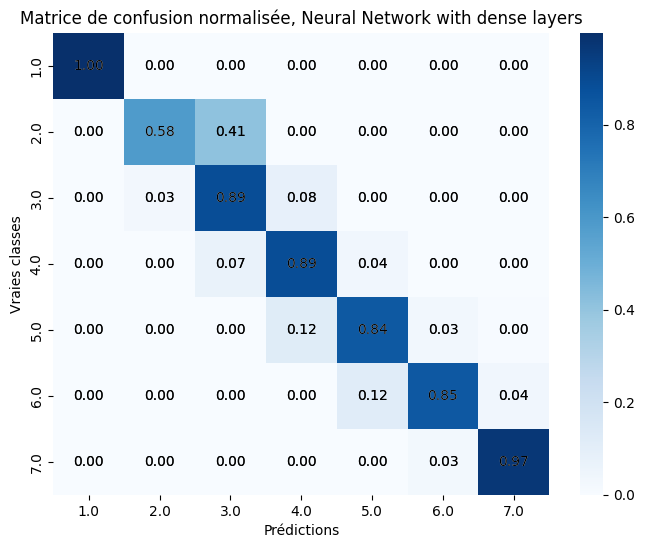

Test Accuracy: 0.873
F1-score: 0.872
Recall: 0.873


In [110]:
# y_pred_classes predicts the class -1, so the marix will have to take an corrected input
y_pred_class_corrected = y_pred_classes + 1
display_norm_matrix(name, y_pred_class_corrected, y_test_adjusted+1, hyperparams=hyperparams)
print(f"Test Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Recall: {recall:.3f}")

In [101]:
# display_roc(X_test_scaled, y_test, y_pred, model)

On ne ressent pas pour ce modèle le besoin d'égaliser les classes sur le dataset d'entraînement  

# Tentatives d'optimisation par randomizedSearchCV

Ceci ne s'appliquera pas pour le paramétrage d'un réseau de neurones

# Tentative d'optimisation par pénalité

à voir si le besoin se fait sentir au vu des résultats.  
Ce sera seulement faisable si l'on a one_hot_encoded y_train et y_test

In [102]:
# paramètres pour ce chapitre:
threshold = 0.012 # par exemple 0.1 pour 10% de favorisation

In [103]:
""" # Prédire les classes sur les données de test
y_prob = model.predict_proba(X_test_scaled)

y_adjusted_pred= adjust_with_penalty(y_prob,threshold) """

' # Prédire les classes sur les données de test\ny_prob = model.predict_proba(X_test_scaled)\n\ny_adjusted_pred= adjust_with_penalty(y_prob,threshold) '

In [104]:
""" from sklearn.metrics import accuracy_score, f1_score, recall_score

# Calculate new metrics
adjusted_accuracy = accuracy_score(y_test, y_adjusted_pred)
adjusted_f1 = f1_score(y_test, y_adjusted_pred, average='weighted')
adjusted_recall = recall_score(y_test, y_adjusted_pred, average='weighted')  # Include recall calculation

# Print the metrics
print(f"Adjusted Accuracy: {adjusted_accuracy:.4f}")
print(f"Adjusted F1-Score: {adjusted_f1:.4f}")
print(f"Adjusted Recall: {adjusted_recall:.4f}")
 """

' from sklearn.metrics import accuracy_score, f1_score, recall_score\n\n# Calculate new metrics\nadjusted_accuracy = accuracy_score(y_test, y_adjusted_pred)\nadjusted_f1 = f1_score(y_test, y_adjusted_pred, average=\'weighted\')\nadjusted_recall = recall_score(y_test, y_adjusted_pred, average=\'weighted\')  # Include recall calculation\n\n# Print the metrics\nprint(f"Adjusted Accuracy: {adjusted_accuracy:.4f}")\nprint(f"Adjusted F1-Score: {adjusted_f1:.4f}")\nprint(f"Adjusted Recall: {adjusted_recall:.4f}")\n '

In [105]:
""" 
differences, count_misadjustments, count_right_adjustments = check_differences(y_pred, y_adjusted_pred, y_test)
display(differences)
print("\nCount of misadjustments (real_3 to 2):      ", count_misadjustments)
print("Count of rightful adjustments (real_2 to 2):", count_right_adjustments) """

' \ndifferences, count_misadjustments, count_right_adjustments = check_differences(y_pred, y_adjusted_pred, y_test)\ndisplay(differences)\nprint("\nCount of misadjustments (real_3 to 2):      ", count_misadjustments)\nprint("Count of rightful adjustments (real_2 to 2):", count_right_adjustments) '

Ici, on remarque que dès les premières lignes affectées par la pénalité, on commence à classer des lignes de classe réelles 3 en classe 2, donc cela explique qu'on n'améliore pas la performance avec la pénalité.

Puis faire des représentations graphiques pour le rapport

# Interprêtabilité des résultats

In [106]:
# Résumé pour non experts :
# - L'architecture montre la structure du modèle (comme un plan de construction).
# - Le résumé offre une vue générale facile à comprendre (comme une présentation rapide).
# - Les poids appris sont les compétences acquises par le modèle après "l'entraînement" (comme les connaissances d'un élève).

# Affichage de l'architecture du modèle
print("Architecture du modèle (plan de construction) :")
model_config = model.get_config()
print(model_config)

print("\n---")

# Affichage du résumé du modèle
print("Résumé du modèle (présentation rapide) :")
model.summary()

print("\n---")

# Affichage des poids appris par le modèle
print("Poids appris par le modèle (compétences acquises après entraînement) :")
model_weights = model.get_weights()
for i, weight in enumerate(model_weights):
    print(f"Poids de la couche {i + 1}: {weight}")

Architecture du modèle (plan de construction) :
{'name': 'sequential_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 24), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_4'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_16', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': No

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,287 (1.02 MB)

 Trainable params: 89,095 (348.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 178,192 (696.07 KB)


---
Poids appris par le modèle (compétences acquises après entraînement) :
Poids de la couche 1: [[-0.03765621  1.3932848   1.1246043  ... -0.5946082   1.6924555
  -2.0660255 ]
 [ 0.14445065  0.64175606 -0.75390464 ...  0.1158729  -1.7141234
  -0.2817989 ]
 [ 0.48294327 -1.0801408   0.02712201 ...  0.1467694   0.04008402
   0.1758022 ]
 ...
 [ 0.7939574  -0.7027717  -0.01594198 ...  0.62694407 -0.22582658
  -0.24520993]
 [-0.3182729   0.01090026  0.28084168 ... -0.63731533 -0.01596835
   0.09134627]
 [-0.8115197  -0.16556491 -1.348914   ...  0.7049218  -0.35283506
   0.03133171]]
Poids de la couche 2: [-0.01941763 -0.44886017 -0.8390359  -0.4030353  -0.50564754 -1.4069694
 -0.1739052  -1.2986931  -0.6853544  -0.37034947 -0.59078294 -0.47320044
  0.18069832 -0.3389895  -0.55685353 -0.81105363 -0.05208116 -0.88003266
 -1.0147629  -0.57050276 -1.1311706  -0.9421299  -0.66690075 -0.2952677
 -1.9478838  -0.52871716 -0.19847627 -0.88972044 -0.32217187 -0.14940427
 -1.2707602  -1.8045096  -0

Notice pour interprétation de la parie "paramètres", avec premiers exemples de valeurs pour illustrer :  
1. Total params: 2,903 (11.34 KB)
C'est le nombre total de paramètres du modèle, qu'ils soient entraînables ou non. Un paramètre est une valeur ajustable (comme les poids ou les biais dans les couches) que le modèle utilise pour effectuer des prédictions.

La taille totale en mémoire (11.34 KB) montre l'espace nécessaire pour stocker tous les paramètres.

2. Trainable params: 967 (3.78 KB)
Les paramètres "entraînables" sont ceux que l'optimiseur modifie lors de l'entraînement pour minimiser la fonction de perte (loss). Ils incluent les poids et les biais des couches du modèle qui participent activement à l'apprentissage.

Ici, le modèle a 967 paramètres qui seront ajustés pendant l'entraînement.

La taille en mémoire (3.78 KB) montre l'espace nécessaire pour stocker ces paramètres spécifiquement.

3. Non-trainable params: 0 (0.00 B)
Ce sont des paramètres qui ne sont pas modifiés durant l'entraînement, par exemple, des paramètres fixes ou partagés entre plusieurs modèles. Dans notre cas, il n'y a aucun paramètre non-entraînable, ce qui signifie que tous les paramètres du modèle sont impliqués dans l'apprentissage.

4. Optimizer params: 1,936 (7.57 KB)
Ces paramètres sont spécifiques à l'optimiseur utilisé (ici: adam). Ils incluent des variables auxiliaires que l'optimiseur utilise, comme les moyennes mobiles ou les moments pour optimiser la descente de gradient.

Le nombre d'optimiseur paramètres (1,936) reflète les ressources supplémentaires nécessaires pour effectuer les calculs d'optimisation.

La taille en mémoire (7.57 KB) indique l'espace requis pour ces paramètres.

# Sauvegarde du dernier modèle utilisé

In [107]:
# Chemin pour enregistrer le modèle
model_path = base_models + 'rf_nn_dense_relu.h5'
"""
# Enregistrer le modèle entier
model.save(model_path)

print(f"Modèle de réseau de neurones enregistré dans {model_path}")
"""

""" pour le charger :
from tensorflow.keras.models import load_model
model = load_model(model_path)
 """

' pour le charger :\nfrom tensorflow.keras.models import load_model\nmodel = load_model(model_path)\n '